In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
cars.isnull().any().sum()

0

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [5]:
cars.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

column names with space string is difficult to process, so rename the columns. 

In [6]:
cars.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand']

In [7]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
cars[cars.cubicinches == ' ']

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,US.
180,19.8,6,,85,2990,18,1980,US.


In [9]:
cars[cars.weightlbs == ' ']

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225,90,,19,1981,US.
33,21.0,6,199,90,,15,1971,US.
172,29.0,4,68,49,,20,1974,Europe.


There are missing values as space string inside the data. I decide to fill the missing value as 0 first in order to change the data type as numeric, then to decide the strategy to fill the missing value according to the distribution of the data. 

In [10]:
np.where(cars.cubicinches == ' ')

(array([ 40, 180]),)

In [11]:
np.where(cars.weightlbs == ' ')

(array([ 14,  33, 172]),)

In [12]:
imputer = SimpleImputer(missing_values=' ', strategy='constant', fill_value=0)
cars[['cubicinches', 'weightlbs']] = imputer.fit_transform(cars[['cubicinches', 'weightlbs']])

In [13]:
cars['cubicinches'] = cars['cubicinches'].astype(int)
cars['weightlbs'] = cars['weightlbs'].astype(int)

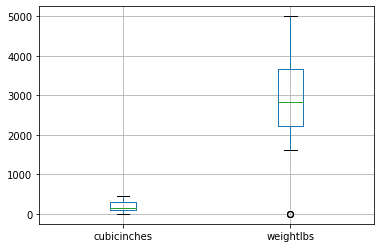

In [14]:
cars.boxplot(column=['cubicinches', 'weightlbs'])

In [15]:
cars[['cubicinches', 'weightlbs']].agg('mean')

cubicinches     199.379310
weightlbs      2975.237548
dtype: float64

In [16]:
cars[['cubicinches', 'weightlbs']].agg('median')

cubicinches     156.0
weightlbs      2830.0
dtype: float64

In [17]:
cars[['cubicinches', 'weightlbs']].agg('mode')
# 2 modes for weightlbs column

,cubicinches,weightlbs
0,97.0,0
1,NaN,2130


I think smaller value is better, not to exaggerate the value of data. 

In [18]:
imputer = SimpleImputer(missing_values=0, strategy='median')
cars[['cubicinches', 'weightlbs']] = imputer.fit_transform(cars[['cubicinches', 'weightlbs']])

In [19]:
cars[40:41]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,156.0,105,3897.0,19,1976,US.


missing values are filled with median values. 

In [21]:
cars.describe(include='all')

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US.
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162
mean,23.144828,5.590038,200.574713,106.360153,3008.197318,15.547893,1976.819923,NaN
std,7.823570,1.733310,108.908003,40.499959,849.233631,2.910625,3.637696,NaN
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000,NaN
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000,NaN
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000,NaN
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000,NaN


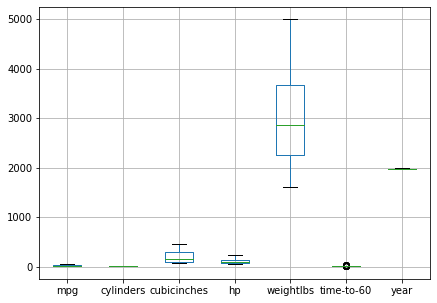

In [22]:
plt.figure(figsize=(7,5))
cars.boxplot()

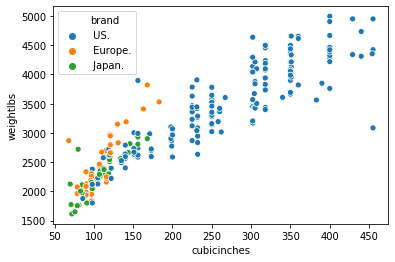

In [23]:
sns.scatterplot(x='cubicinches', y='weightlbs', data=cars, hue='brand')

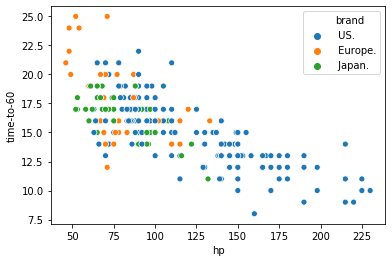

In [24]:
sns.scatterplot(x='hp', y='time-to-60', data=cars, hue='brand')

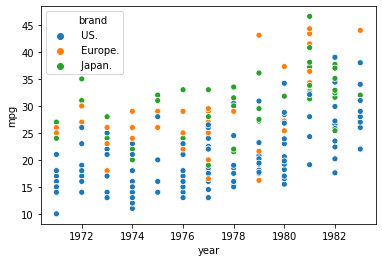

In [25]:
sns.scatterplot(x='year', y='mpg', data=cars, hue='brand')

In [26]:
km = KMeans(n_clusters=3, random_state=42)

df = cars.drop(columns='brand')
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [27]:
df.shape

(261, 7)

In [28]:
km.cluster_centers_

array([[2.04891566e+01, 6.02409639e+00, 2.19036145e+02, 1.08156627e+02,
        3.16499398e+03, 1.57108434e+01, 1.97691566e+03],
       [2.96278261e+01, 4.04347826e+00, 1.07243478e+02, 7.63739130e+01,
        2.22922609e+03, 1.66434783e+01, 1.97764348e+03],
       [1.48095238e+01, 7.84126984e+00, 3.46619048e+02, 1.58730159e+02,
        4.22355556e+03, 1.33333333e+01, 1.97519048e+03]])

In [29]:
km.labels_

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0],
      dtype=int32)

In [30]:
labels = pd.Series(km.labels_, name='cluster_labels')
pd.DataFrame(labels).head()

,cluster_labels
0,2
1,1
2,0
3,2
4,1


In [31]:
compare = pd.concat([cars.brand, labels], axis=1)
compare.head(20)

,brand,cluster_labels
0,US.,2
1,Europe.,1
2,US.,0
3,US.,2
4,US.,1
5,US.,2
6,US.,2
7,US.,2
8,Europe.,0
9,Japan.,1


The predicted cluster and actual brand types are so different. 

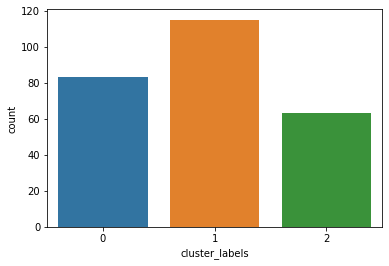

In [32]:
sns.countplot(data=compare, x='cluster_labels')

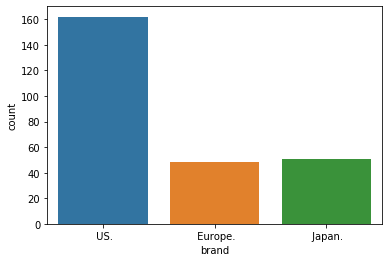

In [33]:
sns.countplot(data=compare, x='brand')

In [34]:
from sklearn.metrics import silhouette_score

silhouette_score(df, km.labels_)

0.566955974927795

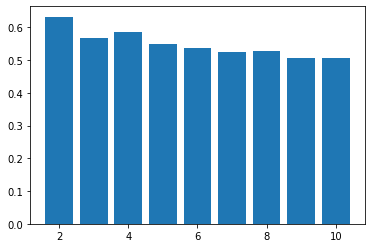

[0.6328759428903902, 0.566955974927795, 0.5862598609026722, 0.5496036094995527, 0.5360202447591864, 0.5261795289655125, 0.5294888726957193, 0.5063067335239517, 0.5078980287332596]


In [35]:
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(df)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

Rather than 3 clusters (actual no. of label types), the silhouette score of 2 clusters is the best. 